Goals of this analysis

1 What is the average order value of a tranasaction?
2 What are our most popular items?

In [1]:
import pandas as pd

In [43]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [7]:
import seaborn as sns

In [11]:
df= pd.read_csv(r"C:\Users\Rtrip\Downloads\dirty_cafe_sales.csv")
df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...,...
9995,TXN_7672686,Coffee,2,2.0,4.0,NaN,UNKNOWN,2023-08-30
9996,TXN_9659401,NaN,3,NaN,3.0,Digital Wallet,NaN,2023-06-02
9997,TXN_5255387,Coffee,4,2.0,8.0,Digital Wallet,NaN,2023-03-02
9998,TXN_7695629,Cookie,3,NaN,3.0,Digital Wallet,NaN,2023-12-02


In [35]:
# check the data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


In [15]:
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [33]:
# get an overview of the descriptives
df.describe()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
count,10000,9667,9862,9821,9827,7421,6735,9841
unique,10000,10,7,8,19,5,4,367
top,TXN_1961373,Juice,5,3.0,6.0,Digital Wallet,Takeaway,UNKNOWN
freq,1,1171,2013,2429,979,2291,3022,159


In [29]:
# check for missing values
df.isnull().sum()

Transaction ID         0
Item                 333
Quantity             138
Price Per Unit       179
Total Spent          173
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64

In [31]:
# check for duplicates
df.duplicated().sum()

0

In [37]:
#Handling the missing values

In [39]:
# make a copy of the dataframe
df1 =df.copy()

In [51]:
# replace "ERROR" and "UNKNOWN" with NaN for easier handling later on

df1 = df1.replace(["ERROR","UNKNOWN"], np.nan, regex=True)

In [49]:
df1.head(10)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,NaN,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,NaN,NaN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
5,TXN_2602893,Smoothie,5,4.0,20.0,Credit Card,NaN,2023-03-31
6,TXN_4433211,NaN,3,3.0,9.0,NaN,Takeaway,2023-10-06
7,TXN_6699534,Sandwich,4,4.0,16.0,Cash,NaN,2023-10-28
8,TXN_4717867,NaN,5,3.0,15.0,NaN,Takeaway,2023-07-28
9,TXN_2064365,Sandwich,5,4.0,20.0,NaN,In-store,2023-12-31


In [61]:
# assign new data types to the different columns

# convert to numeric
df1[['Price Per Unit', 'Quantity', 'Total Spent']] = df1[['Price Per Unit', 'Quantity', 'Total Spent']].apply(pd.to_numeric, errors='coerce')

In [63]:
# convert to category
df1[['Item', 'Location', 'Payment Method']] = df1[['Item', 'Location', 'Payment Method']].astype('category')

In [65]:
# convert to datetime
df1['Transaction Date'] = pd.to_datetime(df1['Transaction Date'],errors='coerce')

In [67]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    10000 non-null  object        
 1   Item              9031 non-null   category      
 2   Quantity          9521 non-null   float64       
 3   Price Per Unit    9467 non-null   float64       
 4   Total Spent       9498 non-null   float64       
 5   Payment Method    6822 non-null   category      
 6   Location          6039 non-null   category      
 7   Transaction Date  9540 non-null   datetime64[ns]
dtypes: category(3), datetime64[ns](1), float64(3), object(1)
memory usage: 420.7+ KB


In [69]:
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [83]:
df1[['Item','Price Per Unit']].value_counts()

Item      Price Per Unit
Juice     3.0               1110
Coffee    2.0               1108
Cake      3.0               1085
Salad     5.0               1082
Sandwich  4.0               1082
Smoothie  4.0               1036
Cookie    1.0               1026
Tea       1.5               1023
Name: count, dtype: int64

In [85]:
# create a dictionary with the known menu prices
menu = {
    "Coffee": 2,
    "Tea": 1.5,
    "Sandwich": 4,
    "Salad": 5,
    "Cake": 3,
    "Cookie": 1,
    "Smoothie": 4,
    "Juice": 3
}

# fill the missing Price Per Unit values where Item is not null
df1['Price Per Unit'] = df1['Price Per Unit'].fillna(df1['Item'].map(menu))


In [95]:
# create an items dictionary that maps the menu prices in reverse
items = {
    2: "Coffee",
    1.5: "Tea",
    4 : "Sandwich",
    5 : "Salad",
    3 : "Cake",
    1 : "Cookie",
    4 : "Smoothie",
    3 : "Juice"
}

# fill the missing Item where Price Per Unit is not null
df1['Item'] = df1['Item'].fillna(df1['Price Per Unit'].map(items))

In [97]:
df1.head(10)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4.0,1.0,NaN,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2.0,5.0,10.0,NaN,NaN,2023-04-27
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11
5,TXN_2602893,Smoothie,5.0,4.0,20.0,Credit Card,NaN,2023-03-31
6,TXN_4433211,Juice,3.0,3.0,9.0,NaN,Takeaway,2023-10-06
7,TXN_6699534,Sandwich,4.0,4.0,16.0,Cash,NaN,2023-10-28
8,TXN_4717867,Juice,5.0,3.0,15.0,NaN,Takeaway,2023-07-28
9,TXN_2064365,Sandwich,5.0,4.0,20.0,NaN,In-store,2023-12-31


In [99]:
# create a function to fill missing values in the numeric columns

def fill_NaN(df1):
    
    # fill missing values in Total Spent by Price Per Unit * Quantity
    condition = df1['Price Per Unit'].notnull() & df1['Quantity'].notnull()
    df1.loc[condition, 'Total Spent'] = df1.loc[condition, 'Price Per Unit'] * df1.loc[condition, 'Quantity']

    #fill missing values in Quantity by Total Spent / Price Per Unit
    condition = df1['Total Spent'].notnull() & df1['Quantity'].notnull()
    df1.loc[condition, 'Price Per Unit'] = df1.loc[condition, 'Total Spent'] / df1.loc[condition, 'Quantity']

    #fill missing values in Price Per Unit by Total Spent / Quantity
    condition = df1['Total Spent'].notnull() & df1['Price Per Unit'].notnull()
    df1.loc[condition, 'Quantity'] = df1.loc[condition, 'Total Spent'] / df1.loc[condition, 'Price Per Unit']

    return df1

df1 = fill_NaN(df1)


In [119]:
df1[['Total Spent','Price Per Unit','Quantity']].notnull().value_counts()

Total Spent  Price Per Unit  Quantity
True         True            True        9974
False        True            False         20
             False           True           3
True         False           False          3
Name: count, dtype: int64

In [121]:
# fill the remaining missing values in Item by the mode
df1['Item'] = df1['Item'].fillna(df1['Item'].mode()[0])

# fill the remaining missing values Price Per Unit with the known Item prices
df1['Price Per Unit'] = df1['Price Per Unit'].fillna(df1['Item'].map(menu))

In [123]:
# fill the re missing values in Quantity by the mean quantity of each Item
df1['Quantity'] = df1['Quantity'].fillna(df1.groupby('Item', observed=False)['Quantity'].transform('mean'))

In [125]:
# run the function again to fill the missing values in Total Spent
df1 = fill_NaN(df1)

In [131]:
# check that all missing values in Item, Quantity, Price Per Unit, and Total Spent have been handled
df1.isnull().sum()

Transaction ID         0
Item                   0
Quantity               0
Price Per Unit         0
Total Spent            0
Payment Method      3178
Location            3961
Transaction Date       0
dtype: int64

In [129]:
# fill the missing values in 'Transaction Date' with ffill
df1['Transaction Date'] = df1['Transaction Date'].ffill()

The Payment Method and Location columns do not appear to show a correlation with the other columns 

Both columns seem to be fairly balanced (see below), so when imputing their missing values, we will aim to preserve this balance.



In [133]:
# check the value counts in Payment Method
df1['Payment Method'].value_counts()

Payment Method
Digital Wallet    2291
Credit Card       2273
Cash              2258
Name: count, dtype: int64

In [135]:
# calculate the distribution of 'Payment Method'
payment_proportions = df1['Payment Method'].value_counts(normalize=True)

# assign missing values based on the distribution
df1.loc[df1['Payment Method'].isna(), 'Payment Method'] = np.random.choice(
    payment_proportions.index, 
    size=df1['Payment Method'].isna().sum(), 
    p=payment_proportions.values
)

In [137]:
# check the value counts in Location
df1['Location'].value_counts()

Location
Takeaway    3022
In-store    3017
Name: count, dtype: int64

In [139]:
# calculate the distribution of 'Location'
location_proportions = df1['Location'].value_counts(normalize=True)

# assign missing values based on the distribution
df1.loc[df1['Location'].isna(), 'Location'] = np.random.choice(
    location_proportions.index, 
    size=df1['Location'].isna().sum(), 
    p=location_proportions.values
)

In [141]:
df1.isnull().sum()

Transaction ID      0
Item                0
Quantity            0
Price Per Unit      0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
dtype: int64

In [160]:
#1 What is the average order value of a tranasaction?

sum_of_total_spent = df1['Total Spent'].sum()
Average_value =sum_of_total_spent /df1.shape[0]
print("Average Order Value : $",round(Average_value,2))

Average Order Value : $ 8.93


In [156]:
df1.shape

(10000, 8)

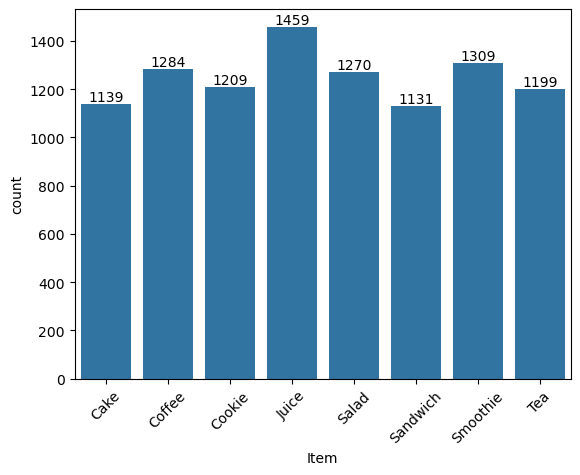

In [166]:
#2 What are our most popular items?

most_pop_item = sns.countplot(df1, x = 'Item')
most_pop_item.bar_label(most_pop_item.containers[0])
plt.xticks(rotation = 45)
plt.show()